In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

In [2]:
file = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Label encoding:- Converting categorical data into numerical data

In [3]:
mapping = {'Male': 1, 'Female': 0}
file['Male'] = file['Gender'].map(mapping)
file = file.drop(['User ID', 'Gender'], axis=1)
file

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


## Regression Model

In [4]:
X = file[['Age', 'Male', 'EstimatedSalary']]
Y = file['Purchased']


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

### Standardization

In [6]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [7]:
lr = LogisticRegression()
lr.fit(X_train, np.ravel(Y_train))
y_pred = lr.predict(X_test)

accuracy_score(Y_test, y_pred)

0.8875

## Confusion Matrix

In [8]:
matrix = confusion_matrix(Y_test, y_pred, labels = lr.classes_)
matrix

array([[50,  2],
       [ 7, 21]])

In [9]:
tp, fn, fp, tn = confusion_matrix(Y_test, y_pred, labels=[1,0]).reshape(-1)
# Reshape = from 2-d array to 1-d array
#Labels is for order of the terms (1 = positives)

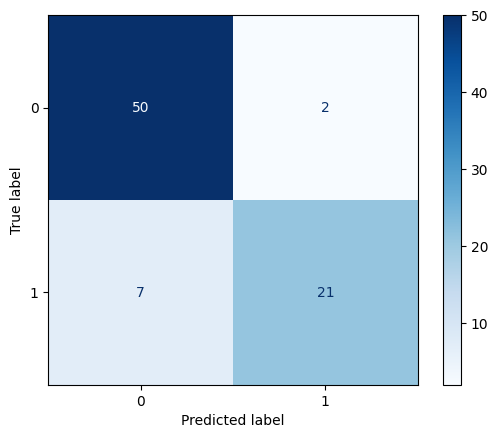

In [10]:
matrix_display = ConfusionMatrixDisplay(confusion_matrix= matrix, display_labels = lr.classes_)
matrix_display.plot(cmap=plt.cm.Blues)

In [11]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



In [12]:
print("Accuracy: ", accuracy_score(Y_test, y_pred))
print("Error Rate: ", (fn + fp)/ (tp+tn+fn+fp))
print("Recall or True Positive Rate: ", tp/(tp+ fn))
print("False Positive Rate: ", fp/(fp + tn))
print("Precision Positive Predective Value: ", tp/ (tp+fp))
print("True negative Rate: ", tn/(fp + tn) )

Accuracy:  0.8875
Error Rate:  0.1125
Recall or True Positive Rate:  0.75
False Positive Rate:  0.038461538461538464
Precision Positive Predective Value:  0.9130434782608695
True negative Rate:  0.9615384615384616
